In [14]:
import sys
sys.path.append("../py/")
from trajectory import *
from data import *
import numpy as np
import pygmo as pg
import PyKEP as pk
import pygmo_plugins_nonfree as pg7
import matplotlib.pyplot as plot
%matplotlib notebook

In [2]:
# setup algorithm
uda = pg7.snopt7(True, "/usr/lib/libsnopt7_c.so")
uda.set_integer_option("Major iterations limit", 4000)
uda.set_integer_option("Iterations limit", 40000)
uda.set_numeric_option("Major optimality tolerance", 1e-3)
uda.set_numeric_option("Major feasibility tolerance", 1e-10)
algo = pg.algorithm(uda)

In [3]:
# solve orbit to orbit problem
udp1 = orbit2orbit(nseg=50, mass=1000, tmax=0.1, isp=2500)
prob1 = pg.problem(udp1)
prob1.c_tol = [1e-8]*(7 + udp1.nseg)

In [4]:
sol1 = np.load("../npy/orbit2orbit.npy")
pop1 = pg.population(prob1, 0)
pop1.push_back(sol1)

In [ ]:
# try to solve until feasible
pop1 = pg.population(prob1, 1)
while not prob1.feasibility_x(pop1.champion_x):
    pop1 = pg.population(prob1, 1)
    pop1 = algo.evolve(pop1)

In [ ]:
# save solution
np.save("../npy/orbit2orbit", pop.champion_x)

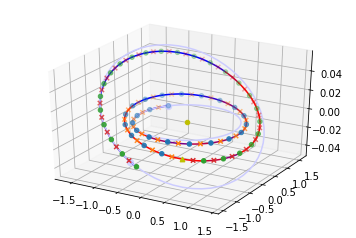

In [5]:
udp1.plot_traj(pop1.champion_x)

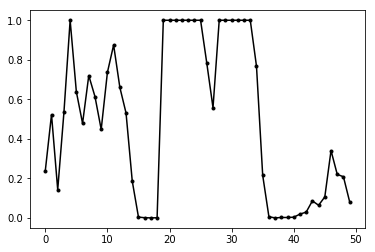

In [6]:
udp1.plot_control(pop1.champion_x)

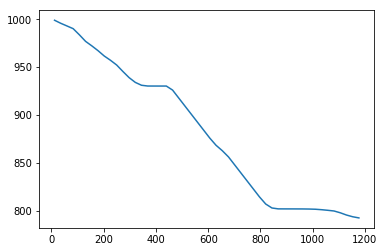

In [7]:
data = udp1.state_control(pop1.champion_x)
plt.close()
plt.plot(data[:,0], data[:,7])
plt.show()

In [8]:
# create new decision vector
T = pop1.champion_x[0]
mf = pop1.champion_x[1]
M0 = pop1.champion_x[2]
Mf = pop1.champion_x[3]
u = pop1.champion_x[4:]
sol2 = np.hstack(([T, mf, Mf], u))

In [9]:
# create new decision vector
r0, v0 = pk.par2ic(udp1.elem0, pk.MU_SUN)
r0 = perturb(r0, 0.01)
v0 = perturb(v0, 0.01)

In [10]:
# instantiate point to orbit problem
udp2 = point2orbit(r0, v0, nseg=50, mass=1000, tmax=0.1, isp=2500)
prob2 = pg.problem(udp2)
prob2.c_tol = [1e-8]*(7 + udp2.nseg)

In [11]:
# create population with guess
pop2 = pg.population(prob2, 0)
pop2.push_back(sol2)

In [12]:
# solve the problem
pop2 = algo.evolve(pop2)

<IPython.core.display.Javascript object>


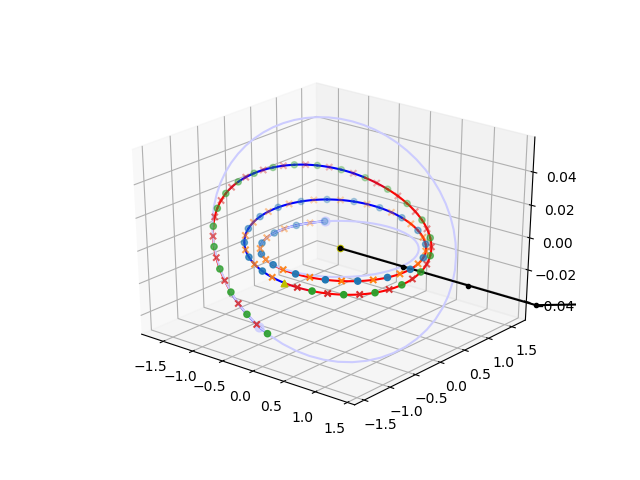

In [15]:
udp2.plot_traj(pop2.champion_x)

<IPython.core.display.Javascript object>


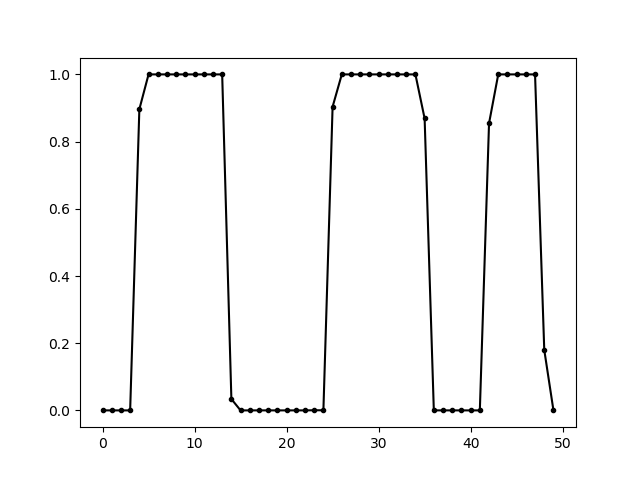

In [17]:
plt.close()
udp2.plot_control(pop2.champion_x)

In [18]:
np.save("../npy/point2orbit", pop2.champion_x)

In [20]:
v0

array([ -1.91272330e+04,  -2.31339295e+04,   6.30875507e-03])